**EDA - 3 Amazon Sales Data**

**Description:-**

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

**Source:-** https://drive.google.com/file/d/1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB/view?usp=drive_link

**Questions:-**

1) What is the average rating for each product category?

2) What are the top rating_count products by category?

3) What is the distribution of discounted prices vs. actual prices?

4) How does the average discount percentage vary across categories?

5) What are the most popular product names?

6) What are the most popular product keywords?

7) What are the most popular product reviews?

8) What is the correlation between discounted_price and rating?

9) What are the Top 5 categories based on the highest ratings?

10) Identify any potential areas for improvement or optimization based on the data analysis?

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# load dataset
df = pd.read_csv('/content/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
#Shape of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df.shape

(1465, 16)

In [ ]:
# Check for Null Values
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
#Data Types
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [ ]:
# Convert the 'rating' column to numeric, forcing invalid values to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [ ]:
# Group by 'category' and calculate the average rating
average_rating_per_category = df.groupby('category')['rating'].mean()
average_rating_per_category

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [ ]:
# Sort the DataFrame by 'category' and 'rating_count' in descending order
top_rating_count_by_category = df.sort_values(by=['category', 'rating_count'], ascending=[True, False])

In [ ]:
# Get the top product in each category
top_products = top_rating_count_by_category.groupby('category').head(1)
top_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1157,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,"₹2,339","₹4,000",42%,3.8,"1,118",[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,₹294,"₹4,999",94%,4.3,"4,426",【WIDER COMPATIBILITY】This USB C Female to USB ...,"AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...","Naga Sai Gadagottu,Neha Sharma,Amazon Customer...","R3CUNCZTU43JPP,RSO46BN8S4OSU,R2UD5D7T4DZRE5,R2...","Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/rts-Adapter-Charging-Con...
906,B009LJ2BXA,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories|Accessories&Peripherals|...,₹649,₹999,35%,3.5,"7,222",Powerful bass and clear treble sounds|Wired co...,"AFIZUD4UBB67LGWY6CVLRHKA75IA,AG2TD3527KNZZNE46...","Deepthi,Nitin Mishra,Raju Chacko,A.VISWANATHAR...","R392ZYXC6D3GY0,R1MJHZXZ09ETAE,R20PJKJTCF9RXN,R...","Headset,Overall a good product. Sound quality ...","Not a perfect fit for long usage,One problem y...",https://m.media-amazon.com/images/I/31eE6slx4E...,https://www.amazon.in/HP-B4B09PA-Headphones-wi...
772,B08HD7JQHX,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹499,60%,3.3,"2,804",SOUND RECORDING: With the Miracle Sound Microp...,"AFILRU3X2FCDPDW5UKLT6C7OPJSA,AFWTGD4FCS2E2U2TD...","Afrina Hasnat,BKBasu,Ayush Raghuvanshi,Wilfrie...","REQ74ZVYY2I01,R15RS7QIKMBY5Z,RCYHKHTW0MAL8,R1A...","No TRRS to TRS converter in the box,Not suitab...",This mic's sound quality is very good but if y...,https://m.media-amazon.com/images/I/41T3Z43M4y...,https://www.amazon.in/HUMBLE-Dynamic-Recording...
844,B08K9PX15C,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,Computers&Accessories|Accessories&Peripherals|...,₹849,"₹1,499",43%,4.0,"7,352",The 2.0 speaker has a versatile design that ca...,"AFC7Q5Q64XM2Y64FT7Y3L2YVALRA,AG7C5TFPIBMWQQC2S...","Balamurugan Trivandrum,prathmesh sawant,Pravee...","R2USVKN5VQX7ZL,R36O11JTBG8NKH,R1OC5OKQ1ZHRT4,R...",Nice product from Zebronics... Using for lapto...,Zebronics Product is always good. I bought thi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Zebronics-Wonderbar-Powe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,B07KCMR8D6,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,₹50,₹50,0%,4.3,"5,792",5 vibrant Neon body color|Smooth and fast writ...,"AEVPRYZLGHNMEZA5BYGIX36LYZXA,AEZPOZQEEBFFXZ2EQ...","Gatij saini,Biswajit Kundu,Altaf Khan,Agam Sar...","RZAAQFY7BDSWC,R3604ZO2AA4PK5,R3C8K6Z6W9MDTQ,R3...","Nice ball pen,Good product,Average,Nice Pen,It...","Very nice ball pen,Thank you Amazon,Easy to ho...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Classmate-Octane-Neon-Pa...
993,B00S2SEV7K,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",OfficeProducts|OfficePaperProducts|Paper|Stati...,₹90,₹100,10%,4.1,"6,199",Unique patented thermo-sensitive Frixion Ink|A...,"AFSJUWV2I4CD53EPCRMOQJ3CWR3Q,AGLYAYWTFPPMLELDG...","Abhay Gupta,vimal rastogi,Sughnesha,Prityush,A...","R1QL22IXTM3HYM,R2BCCQQCMW4X56,R8MW9P91PIMJ3,R1...","Good... 😊,Nice pen but it has some problems.,A...",Bahut aacha hai ye pen

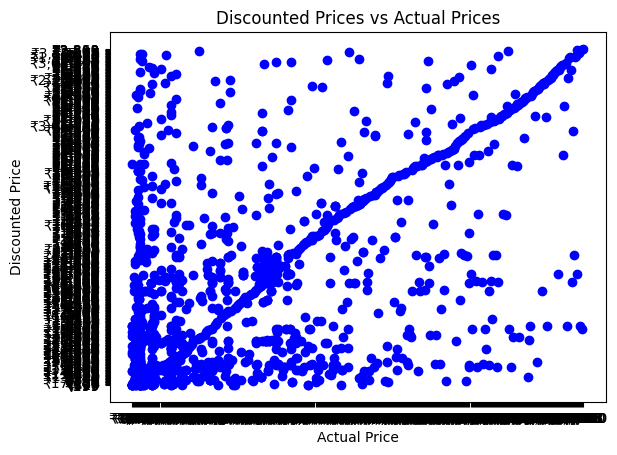

In [ ]:
# Scatter plot for discounted vs actual prices
plt.scatter(df['actual_price'], df['discounted_price'], color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.title("Discounted Prices vs Actual Prices")
plt.show()

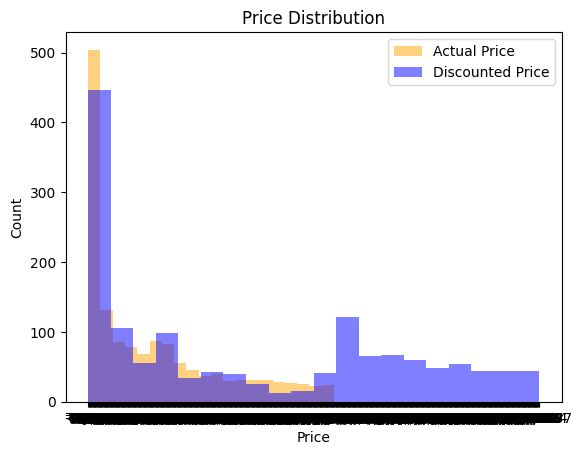

In [ ]:
# Histogram for discounted and actual prices
plt.hist(df['actual_price'], bins=20, alpha=0.5, label='Actual Price', color='orange')
plt.hist(df['discounted_price'], bins=20, alpha=0.5, label='Discounted Price', color='blue')
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.legend()
plt.show()

In [ ]:
# Convert 'discount_percentage' to numeric, force errors to NaN
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

In [ ]:
# Group by 'category' and calculate the average discount percentage
average_discount_per_category = df.groupby('category')['discount_percentage'].mean()
average_discount_per_category

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,NaN
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",NaN


In [ ]:
from collections import Counter
# Choose the column for reviews (e.g., 'review_content')
text_column = df['review_content']

In [ ]:
# Combine all reviews into one string and split into words
words = " ".join(text_column.dropna()).split()
words

['Looks',
 'durable',
 'Charging',
 'is',
 'fine',
 'tooNo',
 'complains,Charging',
 'is',
 'really',
 'fast,',
 'good',
 'product.,Till',
 'now',
 'satisfied',
 'with',
 'the',
 'quality.,This',
 'is',
 'a',
 'good',
 'product',
 '.',
 'The',
 'charging',
 'speed',
 'is',
 'slower',
 'than',
 'the',
 'original',
 'iPhone',
 'cable,Good',
 'quality,',
 'would',
 'recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product',
 'had',
 'worked',
 'well',
 'till',
 'date',
 'and',
 'was',
 'having',
 'no',
 'issue.Cable',
 'is',
 'also',
 'sturdy',
 'enough...Have',
 'asked',
 'for',
 'replacement',
 'and',
 'company',
 'is',
 'doing',
 'the',
 'same...,Value',
 'for',
 'money',
 'I',
 'ordered',
 'this',
 'cable',
 'to',
 'connect',
 'my',
 'phone',
 'to',
 'Android',
 'Auto',
 'of',
 'car.',
 'The',
 'cable',
 'is',
 'really',
 'strong',
 'and',
 'the',
 'connection',
 'ports',
 'are',
 'really',
 'well',
 'made.',
 'I',
 'already',
 'has',
 'a',
 

In [ ]:
# Count the frequency of each word
word_counts = Counter(words)
word_counts

Counter({'Looks': 62,
         'durable': 100,
         'Charging': 84,
         'is': 9755,
         'fine': 256,
         'tooNo': 8,
         'complains,Charging': 8,
         'really': 513,
         'fast,': 22,
         'good': 3278,
         'product.,Till': 8,
         'now': 296,
         'satisfied': 126,
         'with': 3183,
         'the': 11502,
         'quality.,This': 11,
         'a': 5834,
         'product': 2081,
         '.': 324,
         'The': 1364,
         'charging': 658,
         'speed': 298,
         'slower': 22,
         'than': 712,
         'original': 243,
         'iPhone': 74,
         'cable,Good': 9,
         'quality,': 109,
         'would': 488,
         'recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product': 3,
         'had': 485,
         'worked': 100,
         'well': 466,
         'till': 143,
         'date': 36,
         'and': 9156,
         'was': 1590,
         'having': 114,
         '

In [ ]:
# Remove non-numeric characters (like ₹, commas) and convert to float
df['discounted_price'] = df['discounted_price'].replace({'₹': '', ',': ''}, regex=True)

In [ ]:
# Convert the column to numeric, forcing errors to NaN (which can be handled)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

In [ ]:
# Now calculate the correlation
correlation = df[['discounted_price', 'rating']].corr()
correlation

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


In [ ]:
# Group by 'category' and calculate the mean of 'rating' for each category
category_ratings = df.groupby('category')['rating'].mean()
category_ratings

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [ ]:
# Sort the categories by the average rating in descending order and get the top 5
top_5_categories = category_ratings.sort_values(ascending=False).head(5)
top_5_categories

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5
